In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image \
    import extract_patches_2d, reconstruct_from_patches_2d

In [5]:
from skimage import color
from skimage import io

In [11]:
color_img = io.imread('dataset/koala.jpg')

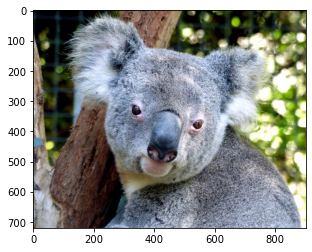

In [12]:
plt.imshow(color_img, cmap = plt.cm.gray)

In [13]:
img = color.rgb2gray(color_img)

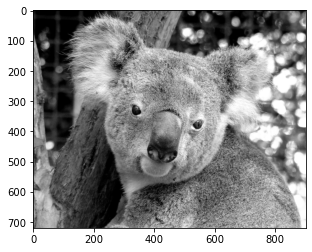

In [14]:
plt.imshow(img, cmap=plt.cm.gray)

plt.show()

In [15]:
img.shape

(720, 902)

In [16]:
height, width = img.shape

In [17]:
distorted_img = img.copy()

In [18]:
distorted_img

array([[0.23508667, 0.18607843, 0.11410627, ..., 0.12523961, 0.15800392,
        0.20645451],
       [0.26645922, 0.19587098, 0.10961137, ..., 0.11683098, 0.15351686,
        0.20477294],
       [0.25664392, 0.18802784, 0.1056898 , ..., 0.14175216, 0.17116039,
        0.20420745],
       ...,
       [0.2650498 , 0.24797961, 0.30736863, ..., 0.99438902, 0.99438902,
        0.99438902],
       [0.22191255, 0.21546824, 0.25638824, ..., 0.99438902, 0.99438902,
        0.99438902],
       [0.19446157, 0.19193882, 0.19364314, ..., 0.99438902, 0.99438902,
        0.99438902]])

In [19]:
distortion = 0.075 * np.random.randn(height, width // 2)

distortion.shape

(720, 451)

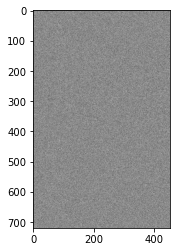

In [20]:
plt.imshow(distortion, cmap='gray')

plt.show()

In [22]:
distorted_img[:, width // 2:] += distortion

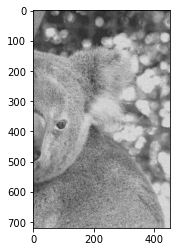

In [23]:
plt.imshow(distorted_img[:, width // 2:], cmap=plt.cm.gray)

plt.show()

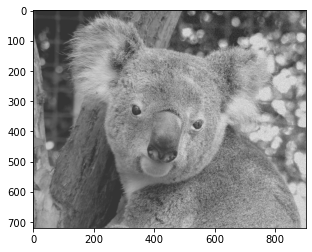

In [24]:
plt.imshow(distorted_img, cmap=plt.cm.gray)

plt.show()

In [25]:
patch_size = (7, 7)

data = extract_patches_2d(distorted_img[:, :width // 2], patch_size)

In [26]:
data.shape

(317730, 7, 7)

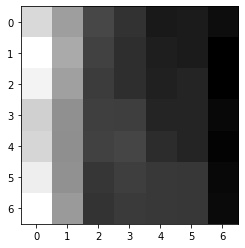

In [27]:
plt.imshow(data[0], cmap=plt.cm.gray)

plt.show()

In [28]:
data = data.reshape(data.shape[0], -1)

In [29]:
data.shape

(317730, 49)

In [30]:
d_learning = MiniBatchDictionaryLearning(n_components=100, alpha=1, n_iter=1000)

components = d_learning.fit(data).components_

components

C:\Users\TOHEEB\anaconda3\envs\playground\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.255e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 5.475e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\TOHEEB\anaconda3\envs\playground\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=2.254e-02, previous alpha=2.254e-02, with an active set of 3 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\TOHEEB\anaconda3\envs\playground\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 

array([[ 0.13550136,  0.13568842,  0.13654078, ...,  0.15017318,
         0.14907407,  0.14738452],
       [ 0.14276686,  0.15325441,  0.15761593, ...,  0.12268111,
         0.12956537,  0.14381304],
       [-0.17419566, -0.1679463 , -0.15402546, ..., -0.13012068,
        -0.10986672, -0.10007223],
       ...,
       [ 0.08936501,  0.15923885,  0.11444385, ...,  0.10066118,
        -0.03565129, -0.10546558],
       [-0.01670696, -0.22572129,  0.05143839, ...,  0.01230873,
         0.03095973,  0.54859307],
       [-0.14731916,  0.15514812,  0.23488953, ...,  0.06881167,
        -0.19364485, -0.21240142]])

In [31]:
components.shape

(100, 49)

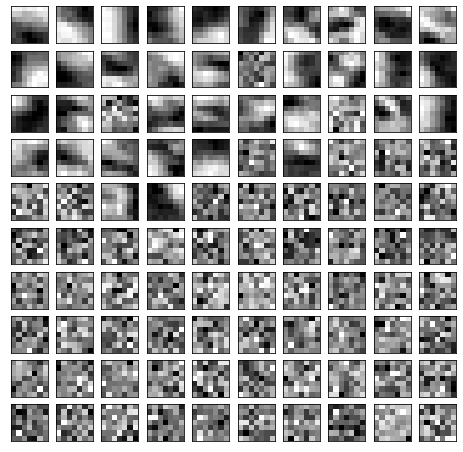

In [32]:
plt.figure(figsize=(8, 8))

for i, comp in enumerate(components):
    
    plt.subplot(10, 10, i + 1)
    
    plt.imshow(comp.reshape(patch_size), 
               cmap=plt.cm.gray_r,
               interpolation='nearest')
    
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [33]:
right_data = extract_patches_2d(distorted_img[:, width // 2:], patch_size)

In [34]:
right_data = right_data.reshape(right_data.shape[0], -1)

right_data.shape

(317730, 49)

In [35]:
d_learning.set_params(transform_n_nonzero_coefs = 1, 
                      transform_algorithm = 'lars')

MiniBatchDictionaryLearning(n_components=100, transform_algorithm='lars',
                            transform_n_nonzero_coefs=1)

In [36]:
code = d_learning.transform(right_data)

In [37]:
print('Shape of code: ', code.shape)
print('Shape of components: ', components.shape)

Shape of code:  (317730, 100)
Shape of components:  (100, 49)


In [38]:
patches = np.dot(code, components)
patches.shape

(317730, 49)

In [39]:
patches = patches.reshape(len(right_data), *patch_size)
patches.shape

(317730, 7, 7)

In [40]:
reconstructed_img = img.copy()

In [41]:
reconstructed_img[:, width // 2:] = \
    reconstruct_from_patches_2d(patches, (height, width // 2))

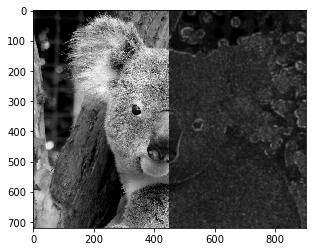

In [42]:
plt.imshow(reconstructed_img, 
           vmin=0, 
           vmax=1, 
           cmap=plt.cm.gray,
           interpolation='nearest')

plt.show()

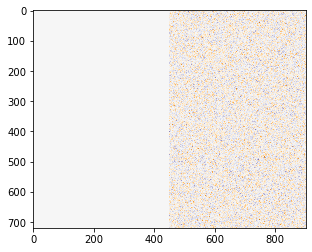

In [43]:
difference = img - distorted_img

plt.imshow(difference, 
           vmin=-0.5, 
           vmax=0.5, 
           cmap=plt.cm.PuOr, 
           interpolation='nearest')

plt.show()

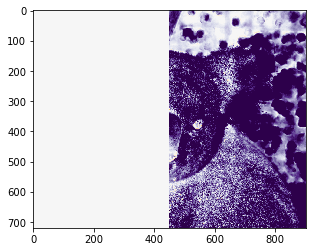

In [44]:
difference = img - reconstructed_img

plt.imshow(difference, 
           vmin=-0.5, 
           vmax=0.5, 
           cmap=plt.cm.PuOr, 
           interpolation='nearest')

plt.show()